## STEP 1: Install & Import Libraries

In [ ]:

# Install missing libraries (only runs if needed)
!pip install scikit-learn pandas numpy matplotlib seaborn --quiet

# Import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building & evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Reproducibility
import random
random.seed(42)
np.random.seed(42)

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


## STEP 2: Upload & Load Dataset

In [ ]:
# Colab me file upload karne ka prompt
from google.colab import files
uploaded = files.upload()  # upload emoji_dataset_expanded.csv (or your CSV)


Saving emoji_dataset_expanded.csv to emoji_dataset_expanded (1).csv


In [ ]:
# Uploaded file ka naam lena
csv_name = list(uploaded.keys())[0]
print("📂 Uploaded:", csv_name)

📂 Uploaded: emoji_dataset_expanded (1).csv


In [ ]:
# Dataset load karna
df = pd.read_csv(csv_name)

In [ ]:
# First few rows dekhna
print("\n📊 First 5 rows:")
print(df.head())


📊 First 5 rows:
                            sentence emoji
0          I’m praying for you. haha     🙏
1                  Good vibes only..     😊
2  This lecture is making me sleepy.     😴
3   I’m really angry right now. haha     😡
4       That joke was hilarious! lol     😂


In [ ]:
# Basic info
print("\nℹ️ Dataset info:")
print(df.info())


ℹ️ Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1200 non-null   object
 1   emoji     1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB
None


In [ ]:
# Class balance check
print("\n⚖️ Emoji count per class:")
print(df['emoji'].value_counts())


⚖️ Emoji count per class:
emoji
🙏     80
😊     80
😴     80
😡     80
😂     80
🥳     80
🔥     80
🎂     80
❤️    80
🥺     80
😱     80
🤔     80
😋     80
😢     80
👍     80
Name: count, dtype: int64



## STEP 3: Preprocessing + Class Balance Visualization


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Text clean function (basic)
def clean_text(text):
    text = str(text).lower().strip()
    return text

In [ ]:
# Apply cleaning
df['sentence'] = df['sentence'].apply(clean_text)

In [ ]:
# Label encoding emojis
le = LabelEncoder()
df['label'] = le.fit_transform(df['emoji'])

/tmp/ipython-input-334126512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129395 (\N{FACE WITH PARTY HORN AND PARTY HAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) DejaVu Sans.
  fig

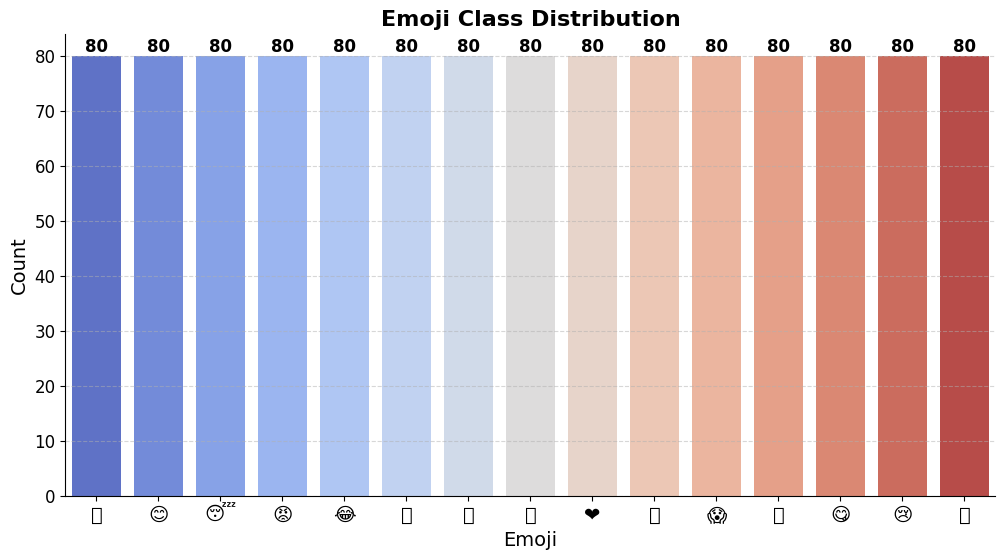

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class balance plot (better version)
plt.figure(figsize=(12,6))
ax = sns.barplot(
    x=df['emoji'].value_counts().index,
    y=df['emoji'].value_counts().values,
    palette="coolwarm"
)

# Title & labels
plt.title("Emoji Class Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Emoji", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show values on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=12, color='black', fontweight='bold'
    )

# Style adjustments
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.show()


## Step 4: Train-test split and TF-IDF vectorization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# X = sentences, y = emojis
X = df['sentence']
y = df['emoji']

In [ ]:
# Encode labels (emojis ko numeric banate hain)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [ ]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Training set size:", X_train_tfidf.shape)
print("Test set size:", X_test_tfidf.shape)

Training set size: (960, 521)
Test set size: (240, 521)


## Step 5: Train the Emoji Prediction Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Model initialization
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')

# Train the model
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

print("Model training complete ✅")

Model training complete ✅


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Step 6: Model Evaluation

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 100.00%


In [32]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

          ❤️       1.00      1.00      1.00        16
           🎂       1.00      1.00      1.00        16
           👍       1.00      1.00      1.00        16
           🔥       1.00      1.00      1.00        16
           😂       1.00      1.00      1.00        16
           😊       1.00      1.00      1.00        16
           😋       1.00      1.00      1.00        16
           😡       1.00      1.00      1.00        16
           😢       1.00      1.00      1.00        16
           😱       1.00      1.00      1.00        16
           😴       1.00      1.00      1.00        16
           🙏       1.00      1.00      1.00        16
           🤔       1.00      1.00      1.00        16
           🥳       1.00      1.00      1.00        16
           🥺       1.00      1.00      1.00        16

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
we

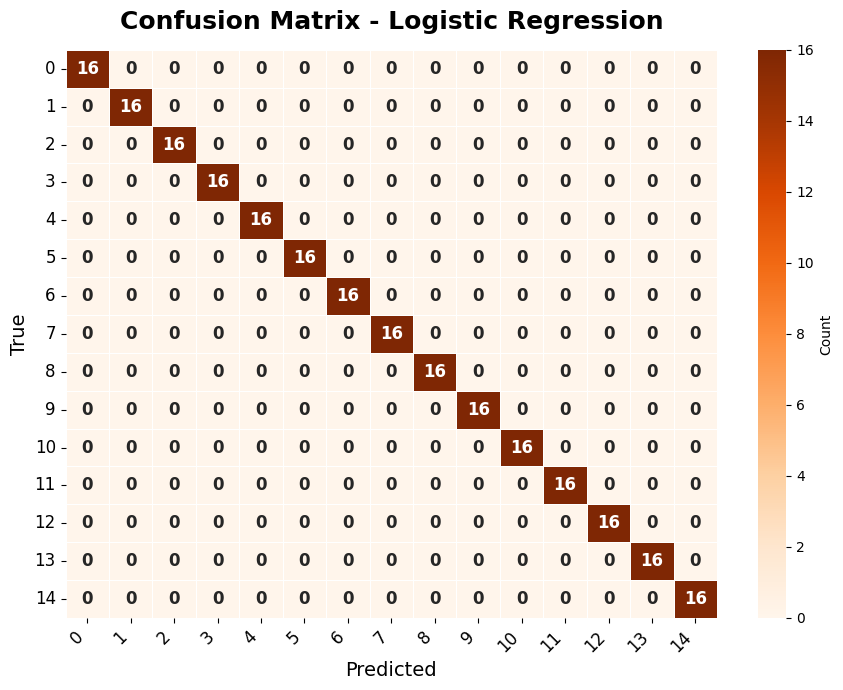

In [56]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9, 7))

# Heatmap with warm gradient
sns.heatmap(cm, annot=True, fmt='d',
            cmap='Oranges',       # clean warm orange tone
            cbar_kws={'label': 'Count'},
            linewidths=0.5, linecolor='white',
            annot_kws={"size": 12, "weight": "bold"})  # bold numbers

# Labels
plt.title("Confusion Matrix - Logistic Regression", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)

# Axis ticks
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()


## Step 7: Model Prediction Test

In [46]:
sample_df = df.sample(5, random_state=42)  # Random 5 sentences

for idx, row in sample_df.iterrows():
    sentence = row['sentence']
    actual = row['emoji']

    cleaned = sentence.lower()
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    pred_emoji = le.inverse_transform([pred])[0]

    print(f"Sentence: {sentence}")
    print(f"Actual Emoji: {actual}")
    print(f"Predicted Emoji: {pred_emoji}")
    print("-" * 40)

Sentence: that’s so shocking!!
Actual Emoji: 😱
Predicted Emoji: 😱
----------------------------------------
Sentence: you have a lovely smile.
Actual Emoji: 😊
Predicted Emoji: 😊
----------------------------------------
Sentence: feeling drowsy at work.
Actual Emoji: 😴
Predicted Emoji: 😴
----------------------------------------
Sentence: i need to go to bed early tonight. omg
Actual Emoji: 😴
Predicted Emoji: 😴
----------------------------------------
Sentence: this game is lit!!
Actual Emoji: 🔥
Predicted Emoji: 🔥
----------------------------------------


## Step 8: Prediction Probability Visualization

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129395 (\N{FACE WITH PARTY HORN AND PARTY HAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byt

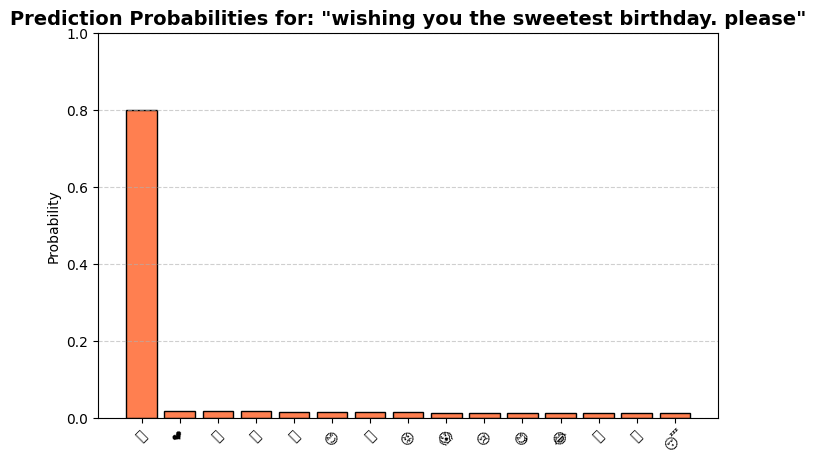

Sentence: wishing you the sweetest birthday. please
🎂 : 79.96 %
❤️ : 1.82 %
🙏 : 1.79 %
🥺 : 1.73 %
🥳 : 1.54 %
😊 : 1.50 %
👍 : 1.48 %
😡 : 1.46 %
😱 : 1.33 %
😢 : 1.28 %
😋 : 1.26 %
😂 : 1.26 %
🤔 : 1.23 %
🔥 : 1.20 %
😴 : 1.15 %


In [47]:
# Example: pick one random sentence from dataset
test_sentence = df.sample(1, random_state=7).iloc[0]['sentence']
cleaned = test_sentence.lower()
vec = vectorizer.transform([cleaned])
probs = model.predict_proba(vec)[0]

# Map emoji labels with probabilities
emoji_probs = dict(zip(le.classes_, probs))

# Sort in descending order
emoji_probs = dict(sorted(emoji_probs.items(), key=lambda x: x[1], reverse=True))

# Plot
plt.figure(figsize=(8,5))
plt.bar(emoji_probs.keys(), emoji_probs.values(), color="coral", edgecolor="black")
plt.title(f"Prediction Probabilities for: \"{test_sentence}\"", fontsize=14, fontweight='bold')
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Print also
print(f"Sentence: {test_sentence}")
for emoji, prob in emoji_probs.items():
    print(f"{emoji} : {prob*100:.2f} %")

# Step 9: Real-Time User Input Prediction with Probability Chart

Enter a sentence: I love programming

Sentence: I love programming
Predicted Emoji: 0

❤️ : 73.96 %
😋 : 2.89 %
👍 : 2.03 %
😢 : 1.95 %
😴 : 1.92 %
🤔 : 1.91 %
😱 : 1.88 %
😊 : 1.85 %
😡 : 1.81 %
🎂 : 1.75 %
🔥 : 1.74 %
🥳 : 1.72 %
😂 : 1.72 %
🙏 : 1.48 %
🥺 : 1.38 %


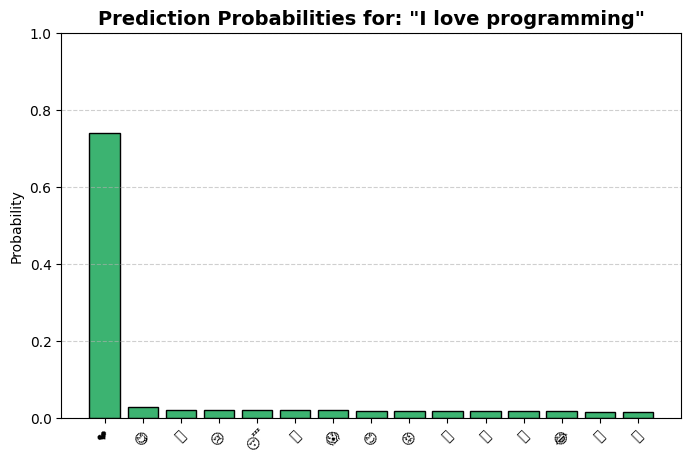

In [48]:
# User input
user_sentence = input("Enter a sentence: ")

# Preprocess & vectorize
cleaned = user_sentence.lower()
vec = vectorizer.transform([cleaned])

# Predict
pred_label = model.predict(vec)[0]
probs = model.predict_proba(vec)[0]

# Map emojis with probabilities
emoji_probs = dict(zip(le.classes_, probs))
emoji_probs = dict(sorted(emoji_probs.items(), key=lambda x: x[1], reverse=True))

# Print prediction
print(f"\nSentence: {user_sentence}")
print(f"Predicted Emoji: {pred_label}\n")

# Print all probabilities
for emoji, prob in emoji_probs.items():
    print(f"{emoji} : {prob*100:.2f} %")

# Plot probability bar chart
plt.figure(figsize=(8,5))
plt.bar(emoji_probs.keys(), emoji_probs.values(), color="mediumseagreen", edgecolor="black")
plt.title(f"Prediction Probabilities for: \"{user_sentence}\"", fontsize=14, fontweight='bold')
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Enter a sentence: lets celebrate

Sentence: lets celebrate
Predicted Emoji: 13

🥳 : 23.15 %
👍 : 6.12 %
😱 : 5.85 %
😋 : 5.85 %
😴 : 5.80 %
😢 : 5.76 %
🤔 : 5.73 %
😊 : 5.61 %
😡 : 5.52 %
🔥 : 5.18 %
🥺 : 5.17 %
😂 : 5.16 %
🙏 : 5.10 %
❤️ : 5.08 %
🎂 : 4.94 %


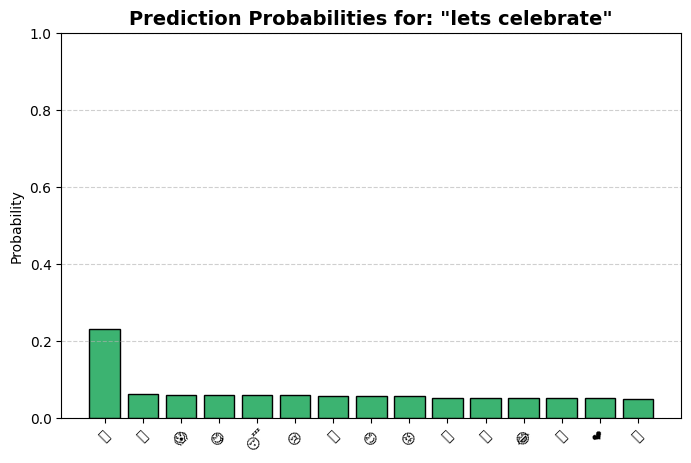

In [50]:
# User input
user_sentence = input("Enter a sentence: ")

# Preprocess & vectorize
cleaned = user_sentence.lower()
vec = vectorizer.transform([cleaned])

# Predict
pred_label = model.predict(vec)[0]
probs = model.predict_proba(vec)[0]

# Map emojis with probabilities
emoji_probs = dict(zip(le.classes_, probs))
emoji_probs = dict(sorted(emoji_probs.items(), key=lambda x: x[1], reverse=True))

# Print prediction
print(f"\nSentence: {user_sentence}")
print(f"Predicted Emoji: {pred_label}\n")

# Print all probabilities
for emoji, prob in emoji_probs.items():
    print(f"{emoji} : {prob*100:.2f} %")

# Plot probability bar chart
plt.figure(figsize=(8,5))
plt.bar(emoji_probs.keys(), emoji_probs.values(), color="mediumseagreen", edgecolor="black")
plt.title(f"Prediction Probabilities for: \"{user_sentence}\"", fontsize=14, fontweight='bold')
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## Step 10: Model Save & Load

In [61]:
import joblib

# ----- Save Model -----
joblib.dump(model, "emoji_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")
print("Model, Vectorizer, and Label Encoder saved successfully!")

# ----- Load Model -----
loaded_model = joblib.load("emoji_model.pkl")
loaded_vectorizer = joblib.load("vectorizer.pkl")
loaded_le = joblib.load("label_encoder.pkl")
print("Model, Vectorizer, and Label Encoder loaded successfully!")

# ----- Test Loaded Model with Multiple Sentences -----
test_sentences = [
    "I am feeling so sleepy right now",   # 😴
    "I love programming so much",         # ❤️
    "Happy birthday to you",               # 🎂
    "I am very angry right now",           # 😡
    "Let's celebrate tonight!"             # 🥳
]

for sentence in test_sentences:
    cleaned = clean_text(sentence)
    vec = loaded_vectorizer.transform([cleaned])
    pred_label = loaded_model.predict(vec)[0]
    pred_emoji = loaded_le.inverse_transform([pred_label])[0]
    print(f"Sentence: {sentence}")
    print(f"Prediction: {pred_emoji}")
    print("-" * 40)


Model, Vectorizer, and Label Encoder saved successfully!
Model, Vectorizer, and Label Encoder loaded successfully!
Sentence: I am feeling so sleepy right now
Prediction: 😴
----------------------------------------
Sentence: I love programming so much
Prediction: ❤️
----------------------------------------
Sentence: Happy birthday to you
Prediction: 🎂
----------------------------------------
Sentence: I am very angry right now
Prediction: 😡
----------------------------------------
Sentence: Let's celebrate tonight!
Prediction: 🥳
----------------------------------------


**File Download in Jupyter/Colab**

In [52]:
from google.colab import files

files.download("emoji_model.pkl")
files.download("vectorizer.pkl")
files.download("label_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>